In [1]:
META_DIR = "$HOME/deepsat/models/neuropol-18-09-18-002956"
MAX_VARIABLE_NUM = 10

In [2]:
import tensorflow as tf
import numpy as np
import os
import sys
sys.path.append('..')
import notebook_tools

In [3]:

sess=tf.Session()    
#First let's load meta graph and restore weights
meta_file = notebook_tools.get_most_fresh_meta(os.path.expandvars(META_DIR))
saver = tf.train.import_meta_graph(meta_file, clear_devices=True)
sess.run(tf.global_variables_initializer())
saver.restore(sess, tf.train.latest_checkpoint(os.path.dirname(meta_file)))

# Now, let's access and create placeholders variables and
# create feed-dict to feed new data

graph = tf.get_default_graph()


INFO:tensorflow:Restoring parameters from /Users/michal/deepsat/models/neuropol-18-09-18-002956/model-7268352


In [10]:
g_inputs = graph.get_tensor_by_name("inputs:0")
LEVEL = 20
BATCH_SIZE = 1
g_policy_probs = graph.get_tensor_by_name('policy_prob_{}:0'.format(LEVEL))
g_sat_probs = graph.get_tensor_by_name('sat_prob_{}:0'.format(LEVEL))

from dpll import DPLL
from cnf import CNF
from cnf_dataset import clauses_to_matrix

class GraphBasedDPLL(DPLL):
    def suggest(self, input_cnf: CNF):
        clause_num = len(input_cnf.clauses)
        var_num = max(input_cnf.vars)
        inputs = np.asarray([clauses_to_matrix(input_cnf.clauses, clause_num, var_num)] * BATCH_SIZE)
        
        policy_probs = sess.run(g_policy_probs, feed_dict={g_inputs: inputs})
                
        best_prob = 0.0
        best_svar = None
        for var in input_cnf.vars:
            for svar in [var, -var]:
                svar_prob = policy_probs[0][var-1][0 if svar > 0 else 1]
                if svar_prob > best_prob:
                    best_prob = svar_prob
                    best_svar = svar
        return best_svar


S: 100 K: 2 N: 2 M: 3
#Sats: 100; avg step: 3.69; stdev step: 1.08; avg error: 0.57; stdev error: 0.59


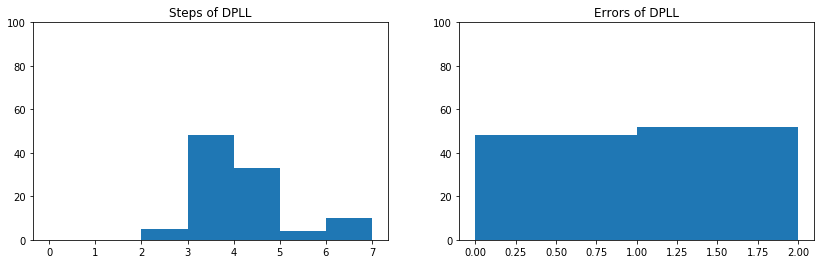

#Sats: 100; avg step: 3.85; stdev step: 1.24; avg error: 0.75; stdev error: 0.70


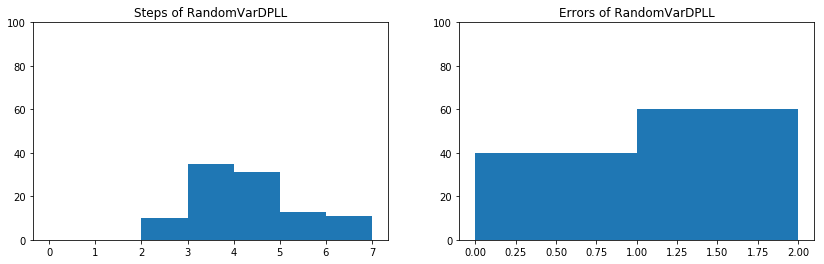

#Sats: 100; avg step: 2.96; stdev step: 0.66; avg error: 0.10; stdev error: 0.30


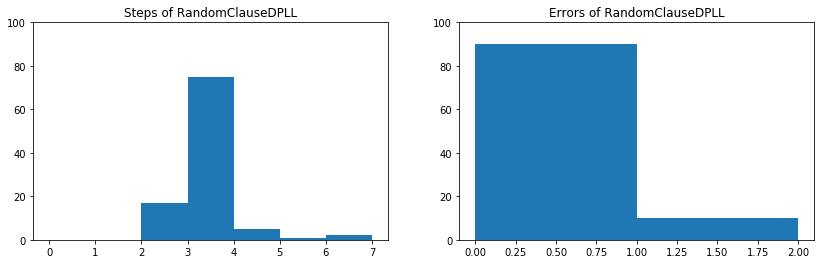

#Sats: 100; avg step: 2.70; stdev step: 0.48; avg error: 0.01; stdev error: 0.10


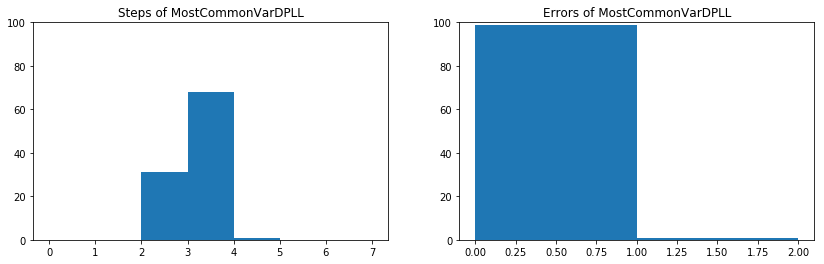

#Sats: 100; avg step: 2.69; stdev step: 0.46; avg error: 0.00; stdev error: 0.00


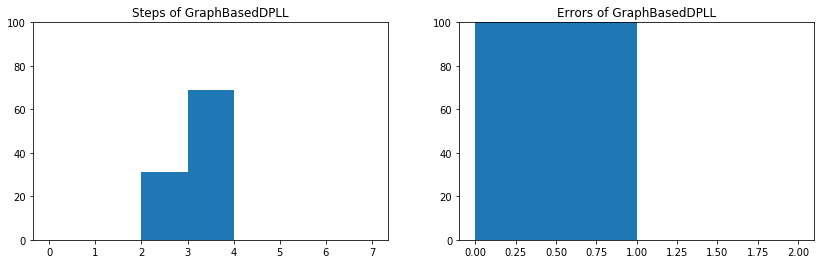

S: 100 K: 2 N: 4 M: 20
#Sats: 100; avg step: 8.20; stdev step: 3.04; avg error: 1.81; stdev error: 1.02


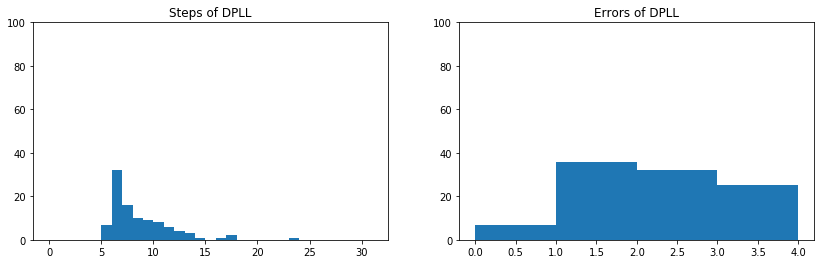

#Sats: 100; avg step: 8.36; stdev step: 2.51; avg error: 1.86; stdev error: 0.98


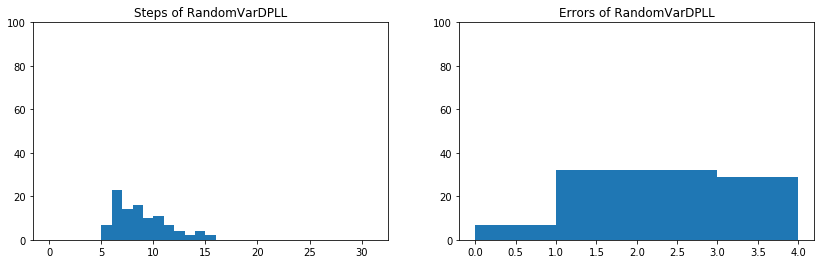

#Sats: 100; avg step: 6.63; stdev step: 2.02; avg error: 0.79; stdev error: 0.73


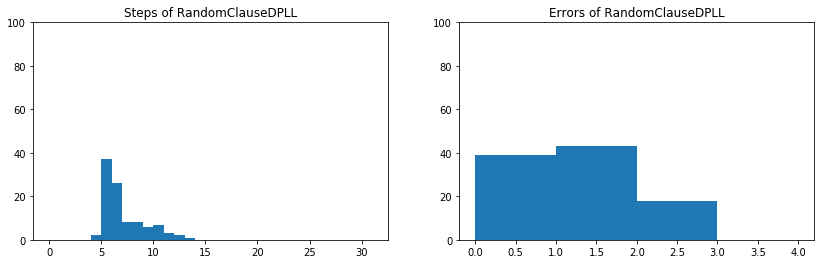

#Sats: 100; avg step: 5.15; stdev step: 0.73; avg error: 0.11; stdev error: 0.31


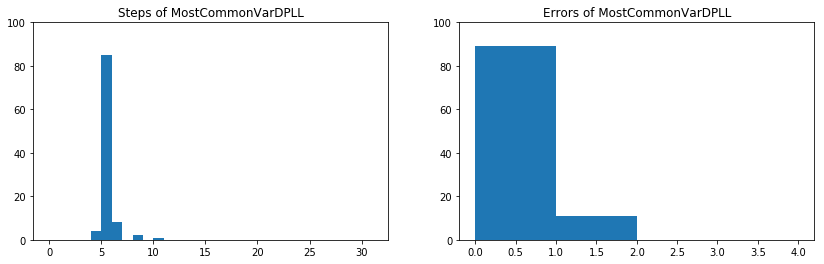

#Sats: 100; avg step: 4.96; stdev step: 0.20; avg error: 0.00; stdev error: 0.00


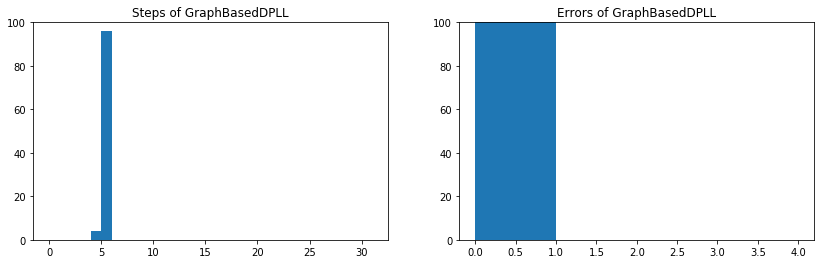

S: 100 K: 3 N: 4 M: 20
#Sats: 100; avg step: 10.80; stdev step: 5.16; avg error: 1.73; stdev error: 0.96


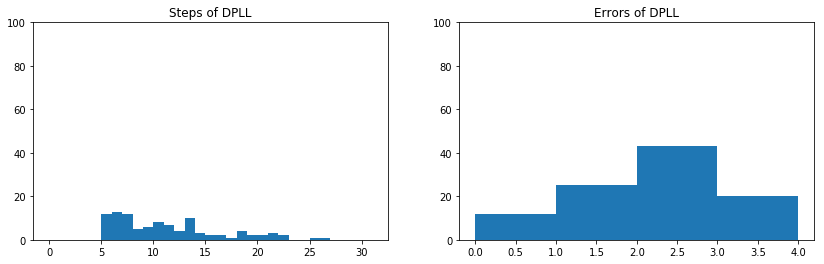

#Sats: 100; avg step: 10.44; stdev step: 4.90; avg error: 1.78; stdev error: 1.00


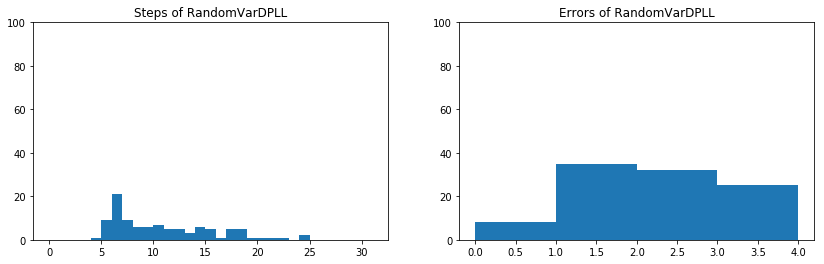

#Sats: 100; avg step: 8.54; stdev step: 4.19; avg error: 0.90; stdev error: 0.85


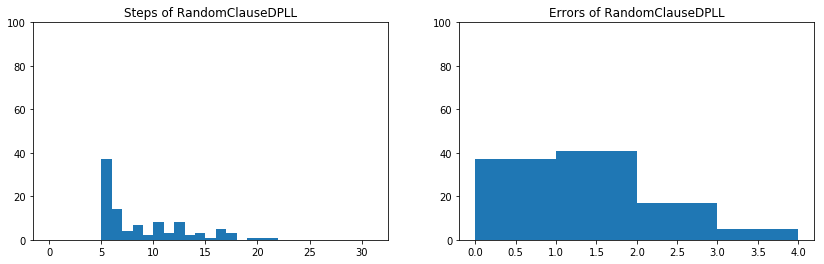

#Sats: 100; avg step: 6.24; stdev step: 2.71; avg error: 0.34; stdev error: 0.51


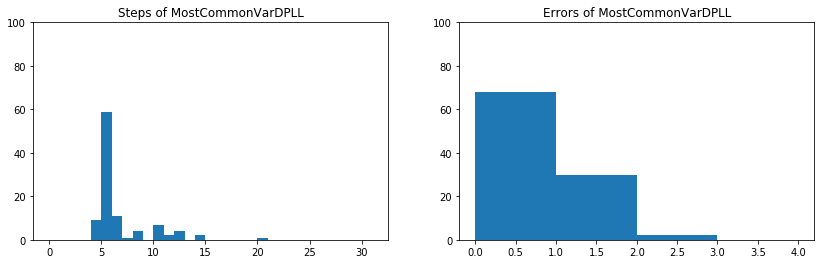

#Sats: 100; avg step: 4.95; stdev step: 0.41; avg error: 0.01; stdev error: 0.10


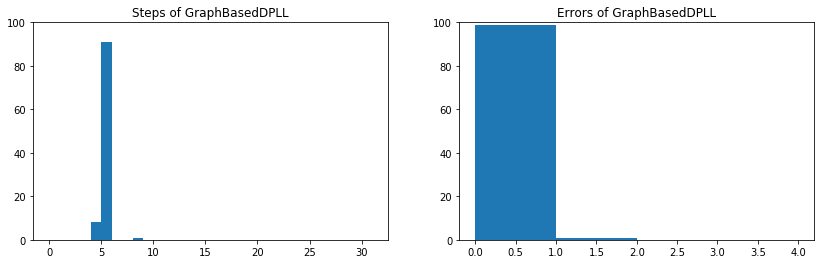

S: 100 K: 3 N: 4 M: 40
#Sats: 100; avg step: 9.83; stdev step: 3.70; avg error: 2.06; stdev error: 0.97


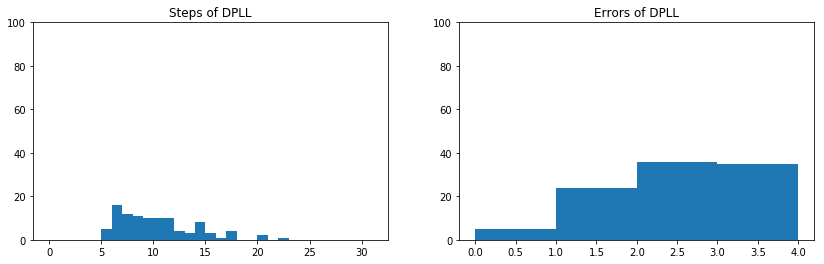

#Sats: 100; avg step: 9.89; stdev step: 3.88; avg error: 1.85; stdev error: 0.93


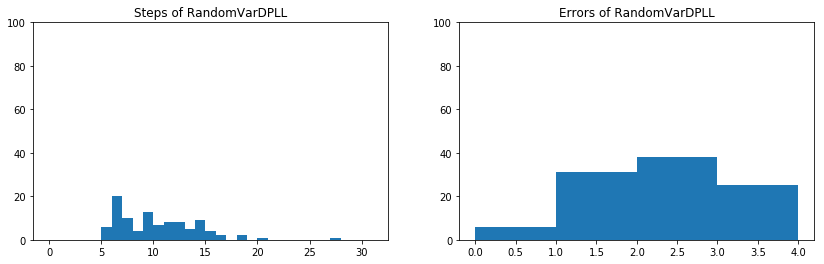

#Sats: 100; avg step: 8.50; stdev step: 3.26; avg error: 1.18; stdev error: 0.89


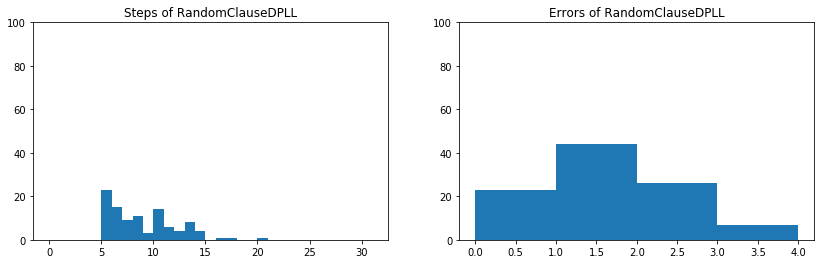

#Sats: 100; avg step: 5.61; stdev step: 1.62; avg error: 0.20; stdev error: 0.40


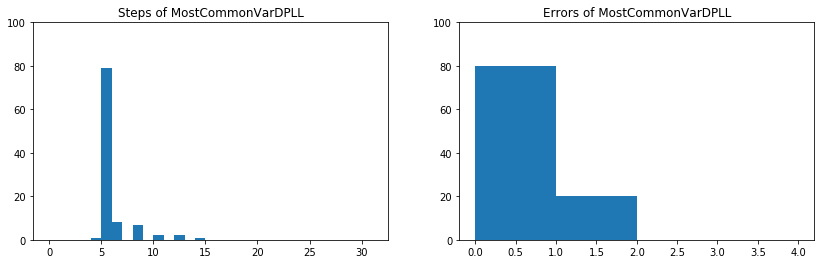

#Sats: 100; avg step: 4.99; stdev step: 0.10; avg error: 0.00; stdev error: 0.00


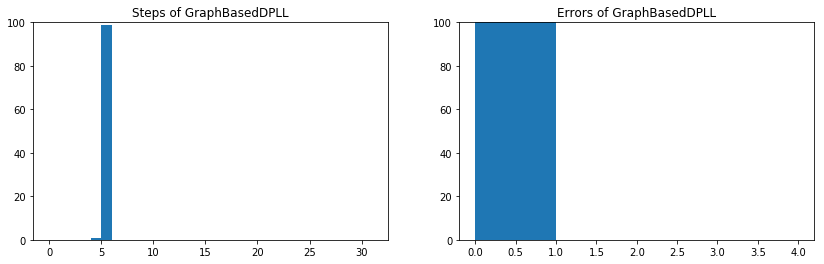

S: 100 K: 3 N: 5 M: 25
#Sats: 100; avg step: 14.80; stdev step: 7.86; avg error: 2.00; stdev error: 1.09


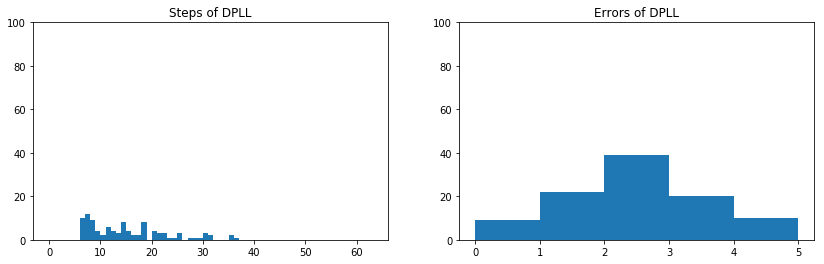

#Sats: 100; avg step: 14.28; stdev step: 8.27; avg error: 2.12; stdev error: 1.02


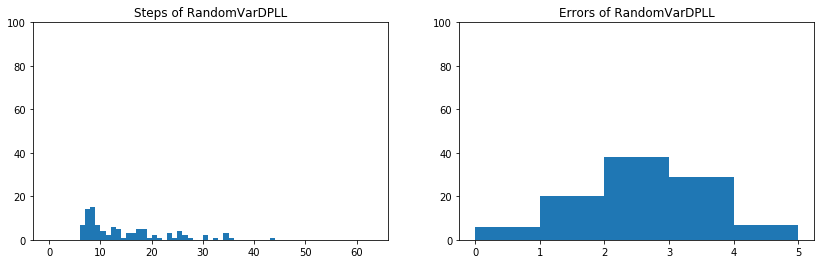

#Sats: 100; avg step: 11.31; stdev step: 5.81; avg error: 1.18; stdev error: 0.89


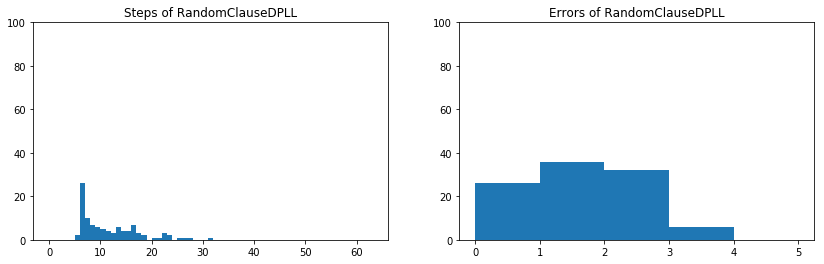

#Sats: 100; avg step: 7.53; stdev step: 3.96; avg error: 0.35; stdev error: 0.55


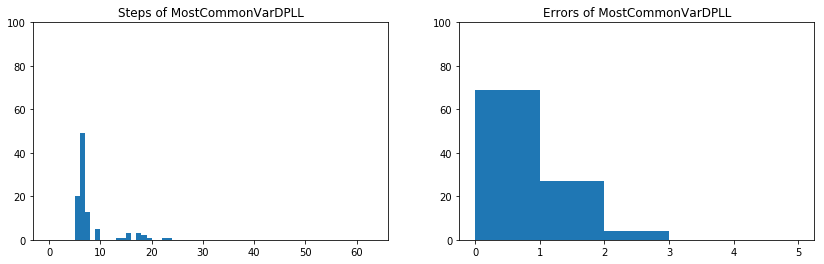

#Sats: 100; avg step: 6.29; stdev step: 2.74; avg error: 0.03; stdev error: 0.17


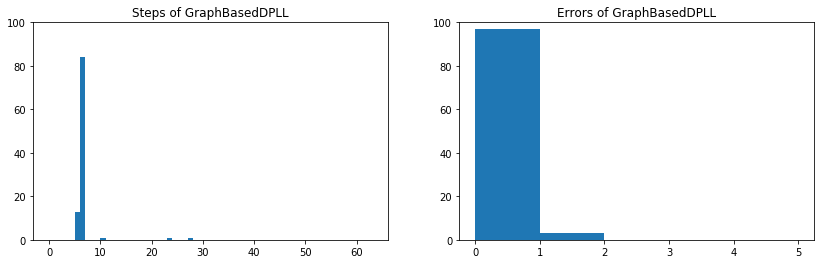

S: 100 K: 3 N: 5 M: 50
#Sats: 100; avg step: 13.31; stdev step: 5.69; avg error: 2.33; stdev error: 1.08


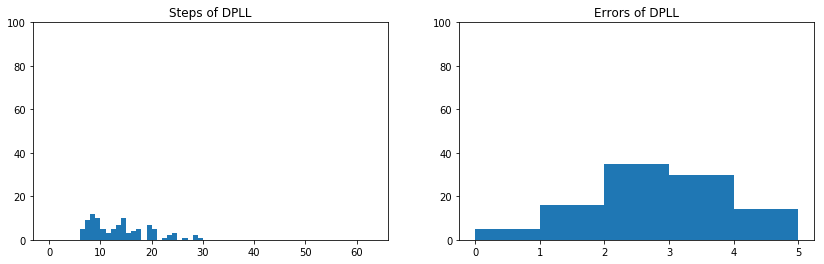

#Sats: 100; avg step: 14.28; stdev step: 5.85; avg error: 2.50; stdev error: 1.11


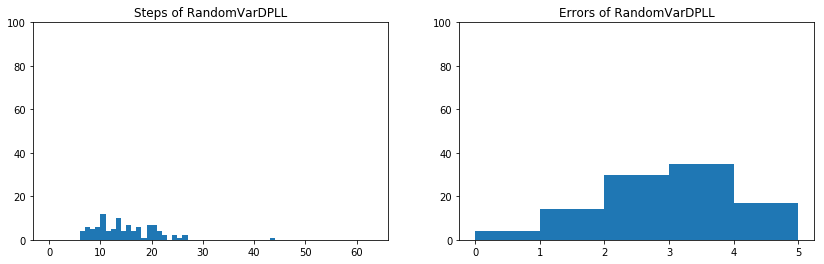

#Sats: 100; avg step: 12.20; stdev step: 5.50; avg error: 1.73; stdev error: 1.05


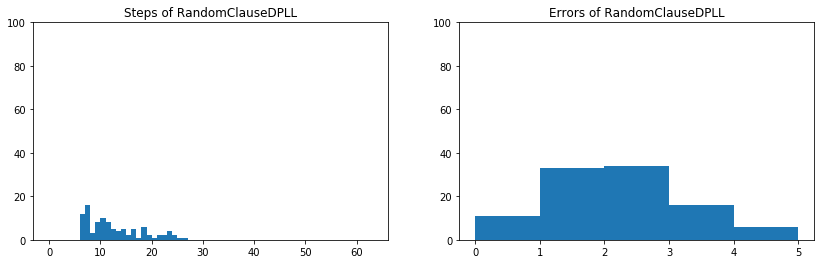

#Sats: 100; avg step: 6.80; stdev step: 2.12; avg error: 0.29; stdev error: 0.45


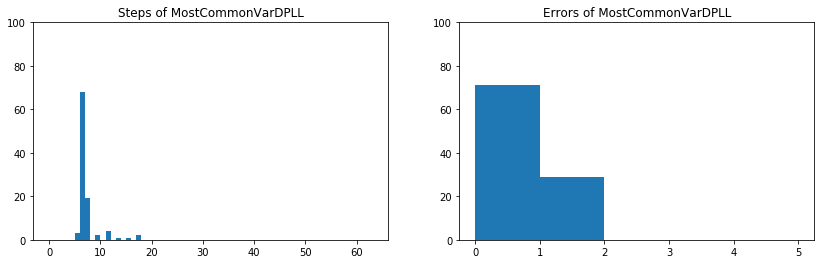

#Sats: 100; avg step: 5.99; stdev step: 0.10; avg error: 0.00; stdev error: 0.00


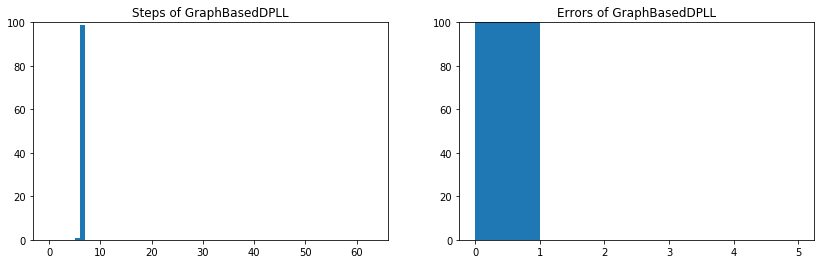

S: 100 K: 3 N: 6 M: 30
#Sats: 100; avg step: 21.68; stdev step: 11.80; avg error: 2.74; stdev error: 1.29


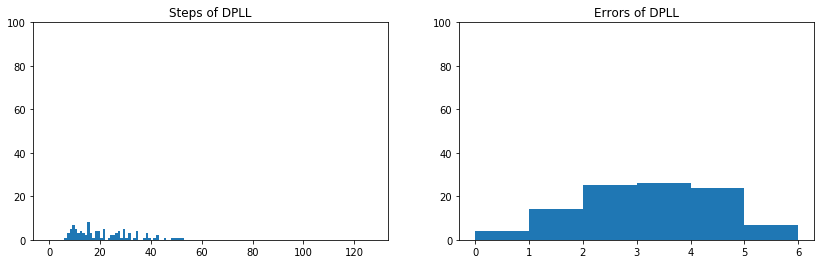

#Sats: 100; avg step: 21.24; stdev step: 10.26; avg error: 2.62; stdev error: 1.11


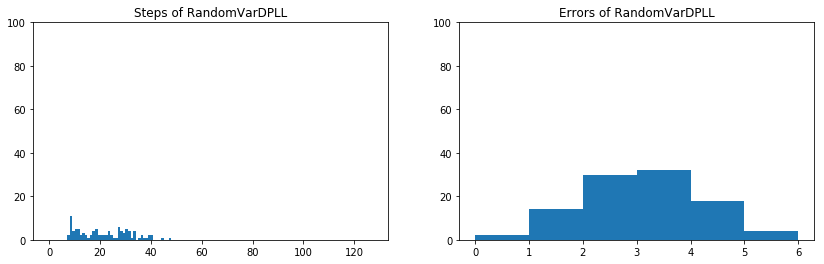

#Sats: 100; avg step: 16.51; stdev step: 8.78; avg error: 1.52; stdev error: 1.03


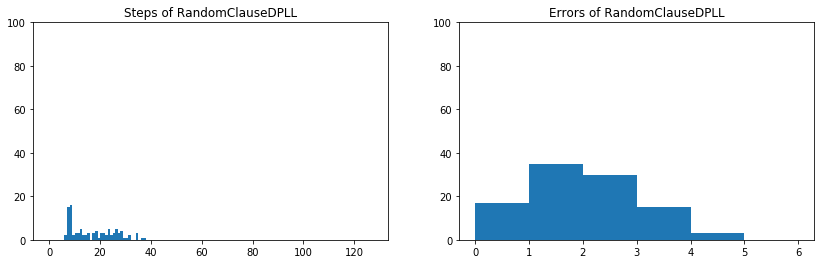

#Sats: 100; avg step: 9.40; stdev step: 5.03; avg error: 0.44; stdev error: 0.55


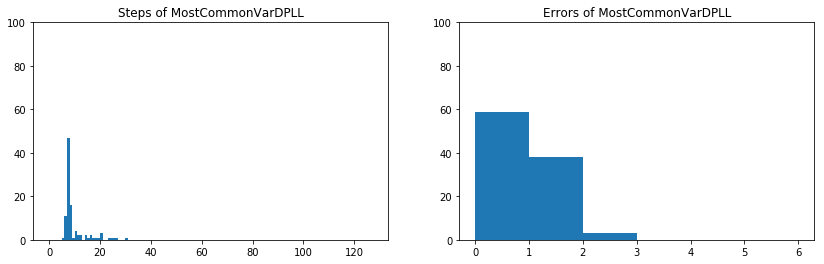

#Sats: 100; avg step: 7.24; stdev step: 2.89; avg error: 0.04; stdev error: 0.24


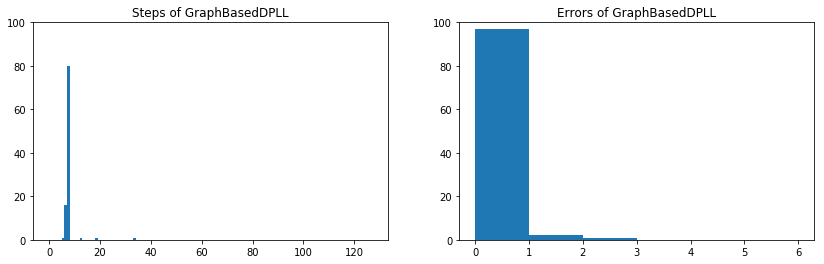

S: 100 K: 3 N: 6 M: 60
#Sats: 100; avg step: 18.15; stdev step: 8.08; avg error: 2.99; stdev error: 1.22


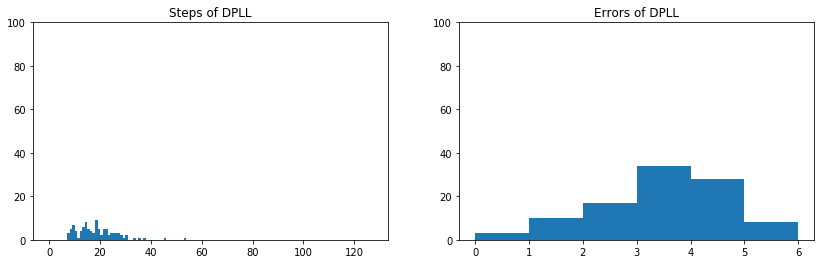

#Sats: 100; avg step: 16.32; stdev step: 7.27; avg error: 2.82; stdev error: 1.33


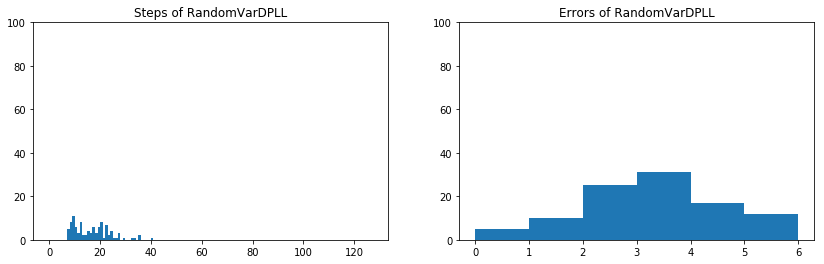

#Sats: 100; avg step: 14.82; stdev step: 6.79; avg error: 1.79; stdev error: 1.15


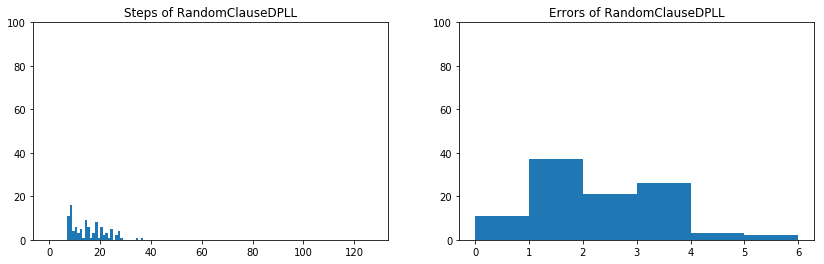

#Sats: 100; avg step: 9.13; stdev step: 4.54; avg error: 0.42; stdev error: 0.59


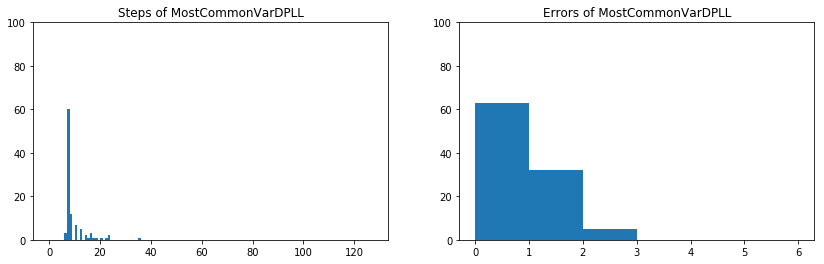

#Sats: 100; avg step: 7.03; stdev step: 0.52; avg error: 0.01; stdev error: 0.10


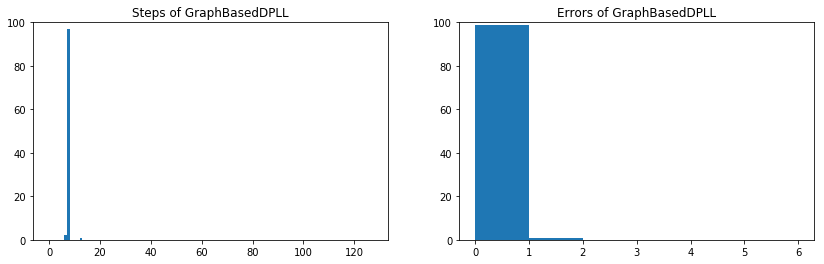

S: 100 K: 3 N: 7 M: 35
#Sats: 100; avg step: 31.17; stdev step: 18.38; avg error: 3.31; stdev error: 1.35


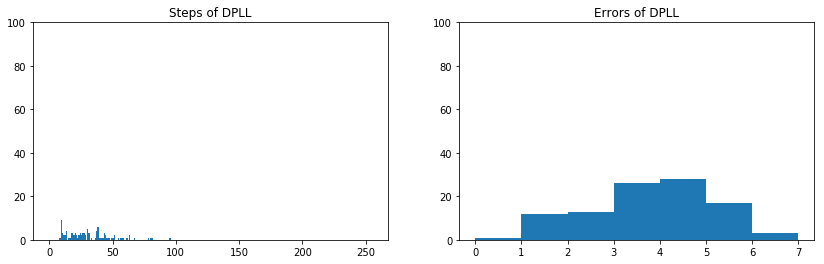

#Sats: 100; avg step: 30.56; stdev step: 16.85; avg error: 3.23; stdev error: 1.39


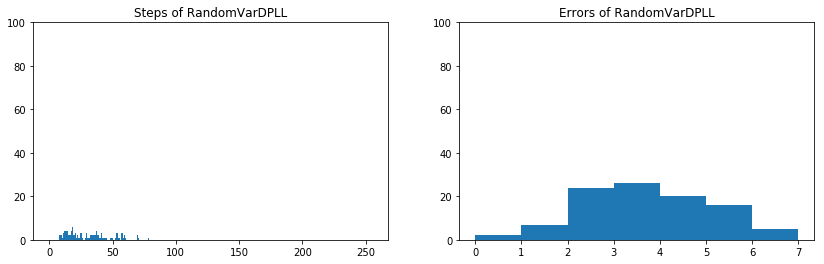

#Sats: 100; avg step: 20.09; stdev step: 14.09; avg error: 1.59; stdev error: 1.17


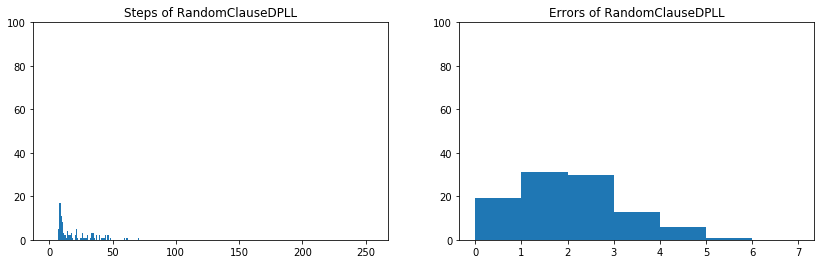

#Sats: 100; avg step: 11.02; stdev step: 6.73; avg error: 0.51; stdev error: 0.66


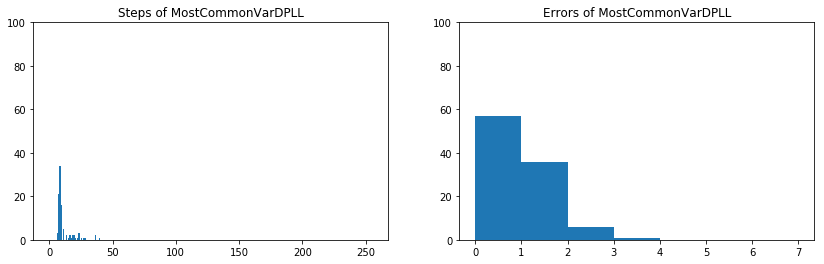

#Sats: 100; avg step: 7.96; stdev step: 1.42; avg error: 0.02; stdev error: 0.14


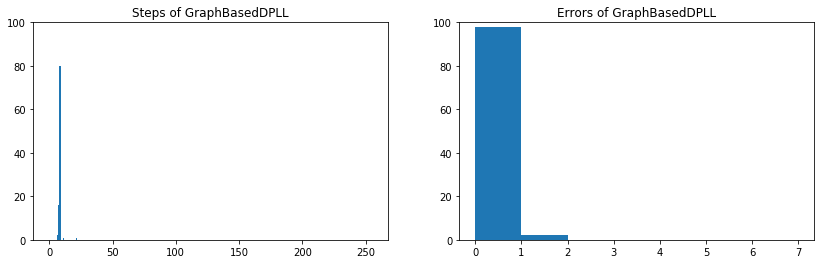

S: 100 K: 3 N: 7 M: 70
#Sats: 100; avg step: 25.40; stdev step: 12.12; avg error: 3.63; stdev error: 1.32


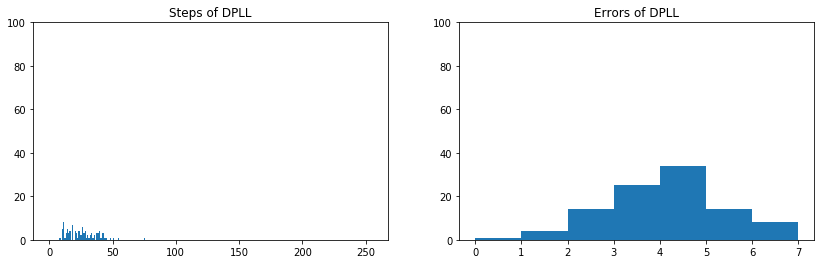

#Sats: 100; avg step: 23.04; stdev step: 12.09; avg error: 3.46; stdev error: 1.48


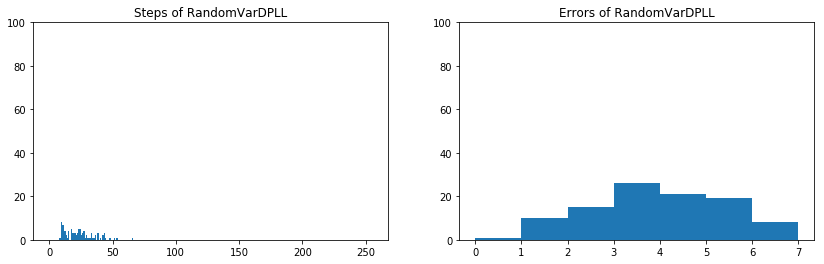

#Sats: 100; avg step: 20.43; stdev step: 9.55; avg error: 2.29; stdev error: 1.05


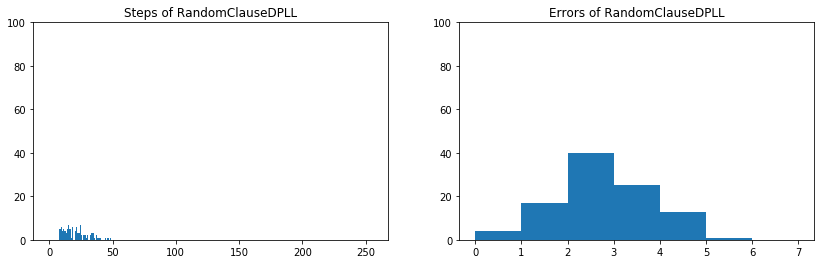

#Sats: 100; avg step: 9.60; stdev step: 3.71; avg error: 0.31; stdev error: 0.48


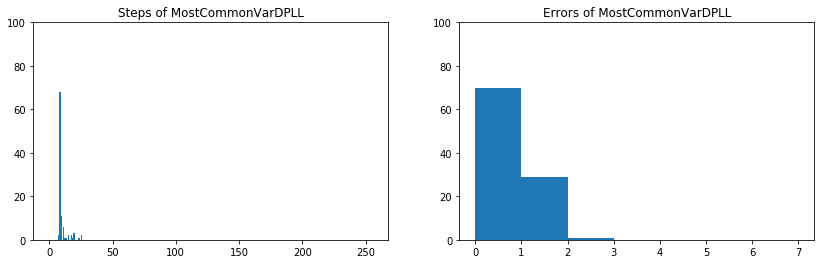

#Sats: 100; avg step: 8.09; stdev step: 1.11; avg error: 0.01; stdev error: 0.10


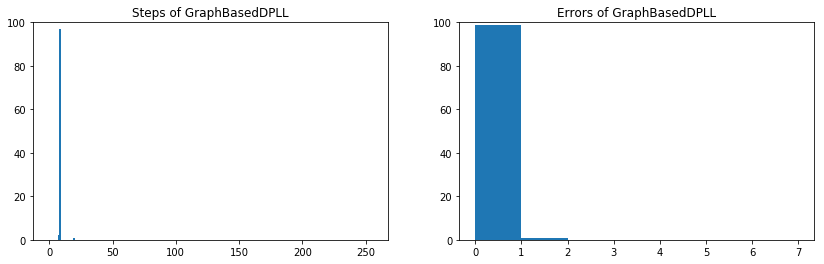

S: 100 K: 3 N: 8 M: 40
#Sats: 100; avg step: 38.82; stdev step: 27.43; avg error: 3.37; stdev error: 1.29


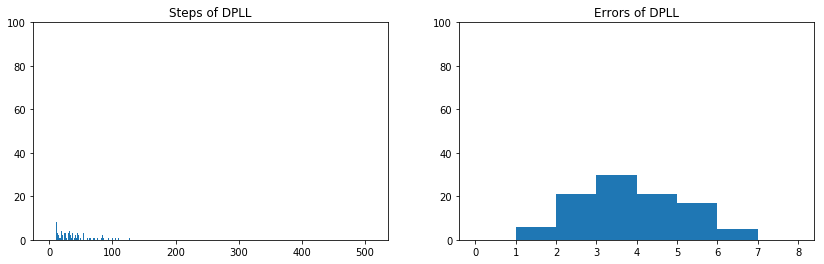

#Sats: 100; avg step: 41.17; stdev step: 25.69; avg error: 3.28; stdev error: 1.46


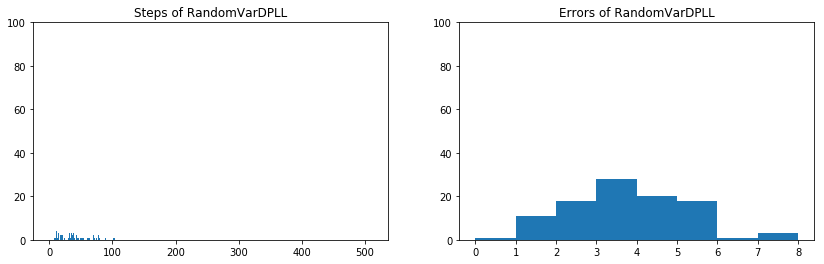

#Sats: 100; avg step: 24.51; stdev step: 15.20; avg error: 1.63; stdev error: 1.13


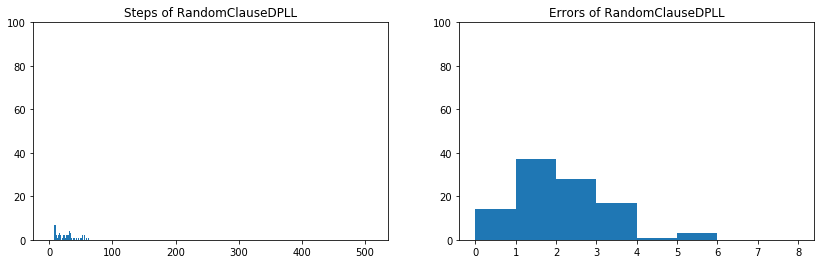

#Sats: 100; avg step: 14.98; stdev step: 10.73; avg error: 0.78; stdev error: 0.92


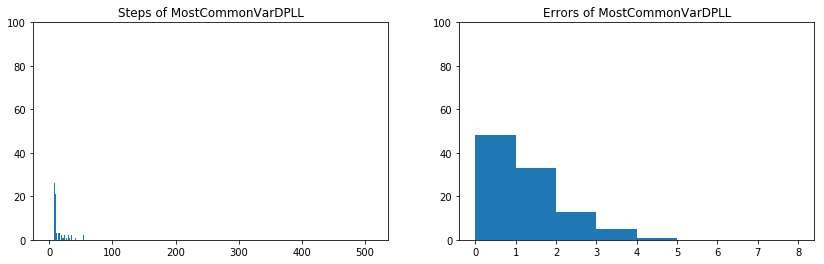

#Sats: 100; avg step: 9.49; stdev step: 7.71; avg error: 0.01; stdev error: 0.10


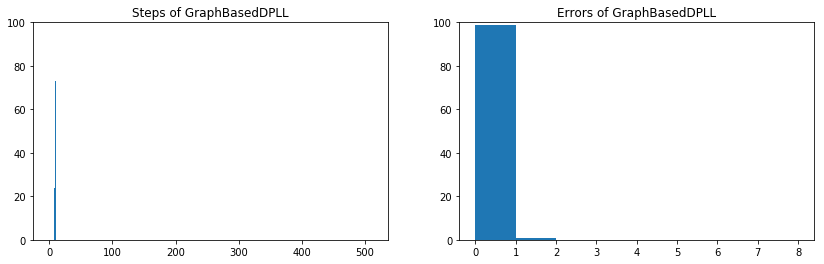

S: 100 K: 3 N: 8 M: 80
#Sats: 100; avg step: 30.93; stdev step: 14.53; avg error: 4.28; stdev error: 1.30


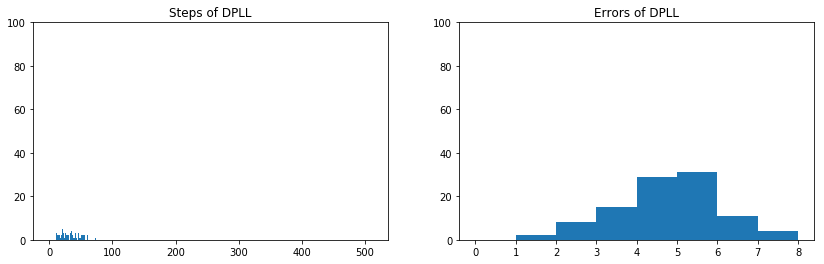

#Sats: 100; avg step: 29.70; stdev step: 14.29; avg error: 3.90; stdev error: 1.32


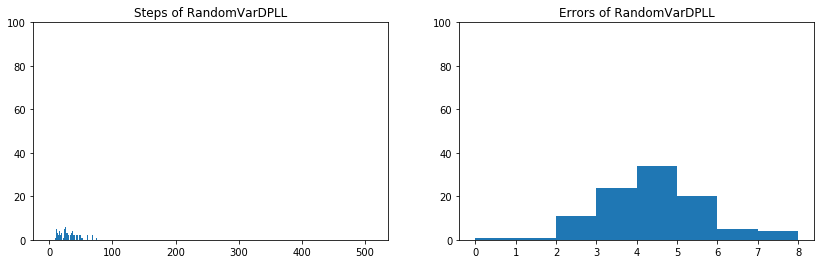

#Sats: 100; avg step: 25.24; stdev step: 12.27; avg error: 2.53; stdev error: 1.21


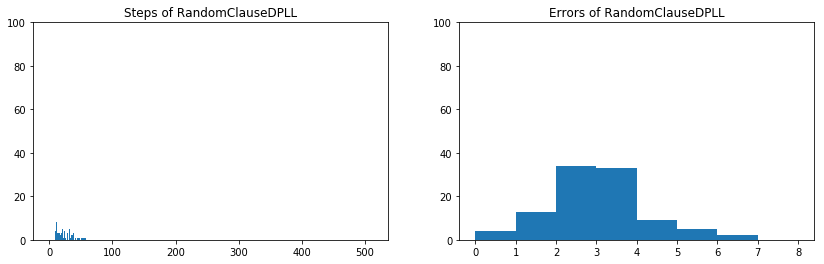

#Sats: 100; avg step: 11.42; stdev step: 5.78; avg error: 0.42; stdev error: 0.57


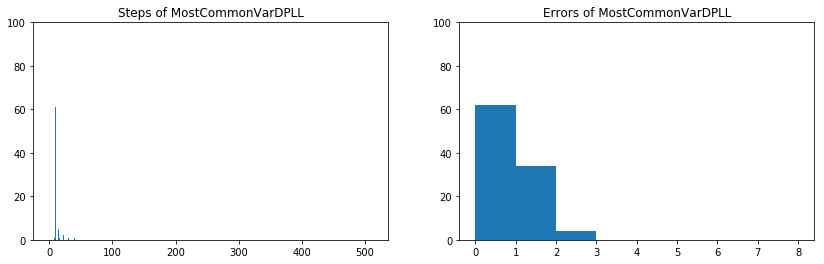

#Sats: 100; avg step: 8.99; stdev step: 0.10; avg error: 0.00; stdev error: 0.00


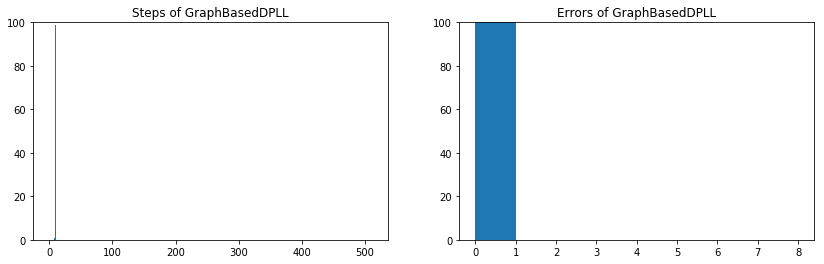

S: 100 K: 3 N: 9 M: 45
#Sats: 100; avg step: 53.06; stdev step: 40.10; avg error: 3.86; stdev error: 1.29


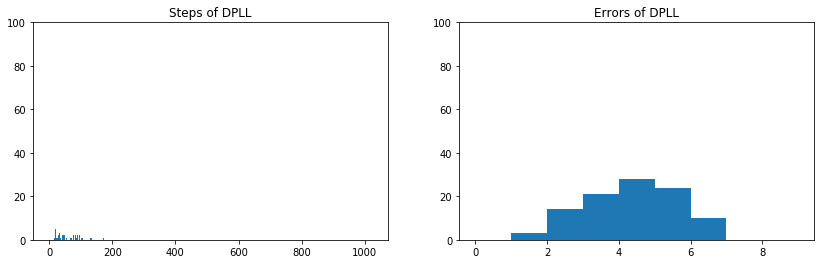

#Sats: 100; avg step: 62.81; stdev step: 38.77; avg error: 4.15; stdev error: 1.41


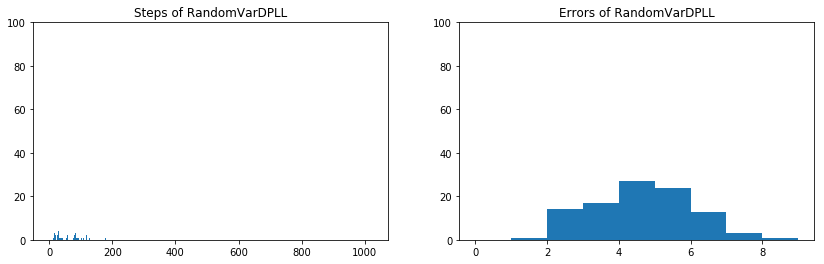

#Sats: 100; avg step: 39.66; stdev step: 26.69; avg error: 2.22; stdev error: 1.28


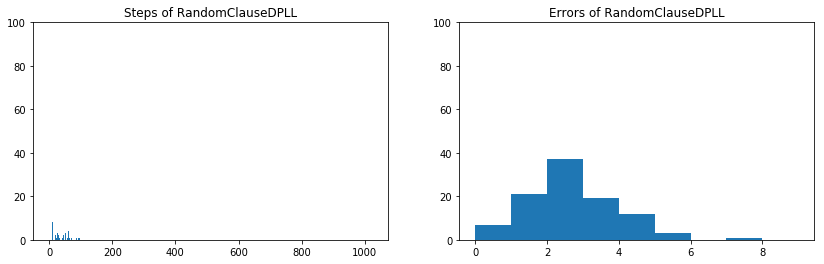

#Sats: 100; avg step: 20.28; stdev step: 18.68; avg error: 0.77; stdev error: 0.80


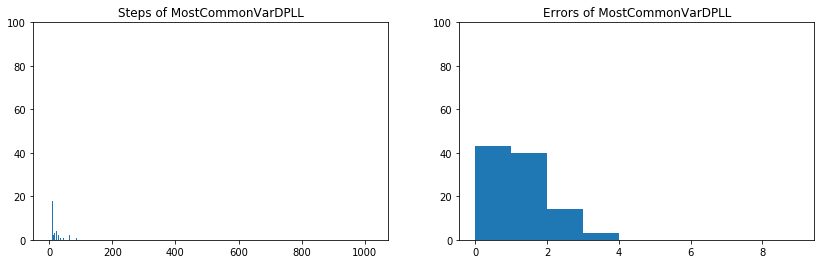

#Sats: 100; avg step: 13.37; stdev step: 18.28; avg error: 0.05; stdev error: 0.22


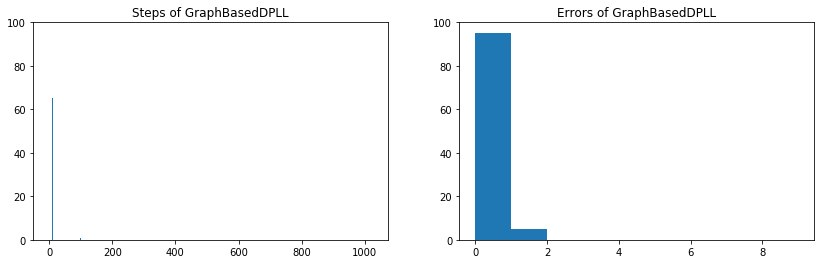

S: 100 K: 3 N: 9 M: 90
#Sats: 100; avg step: 38.98; stdev step: 22.22; avg error: 4.34; stdev error: 1.46


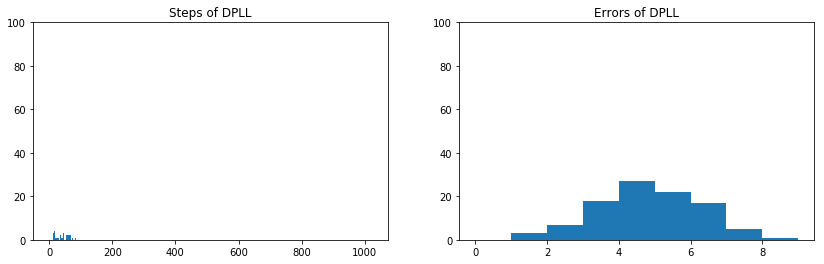

#Sats: 100; avg step: 39.58; stdev step: 18.59; avg error: 4.50; stdev error: 1.51


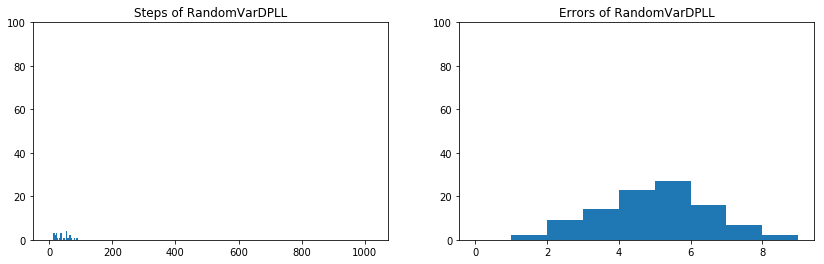

#Sats: 100; avg step: 28.82; stdev step: 15.53; avg error: 2.59; stdev error: 1.50


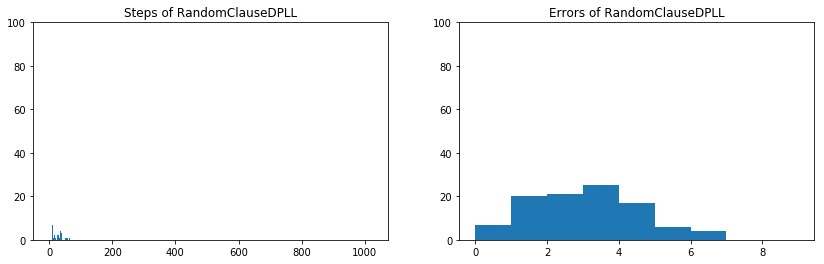

#Sats: 100; avg step: 13.44; stdev step: 7.24; avg error: 0.50; stdev error: 0.64


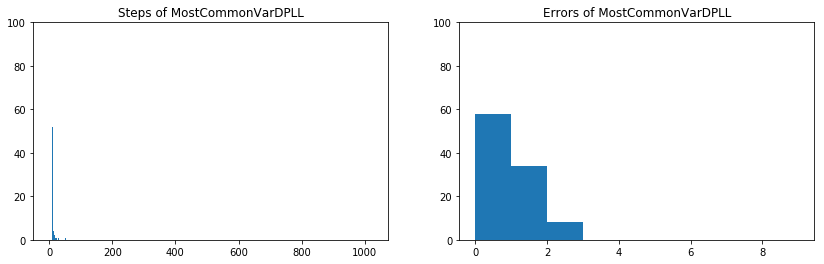

#Sats: 100; avg step: 9.96; stdev step: 0.20; avg error: 0.00; stdev error: 0.00


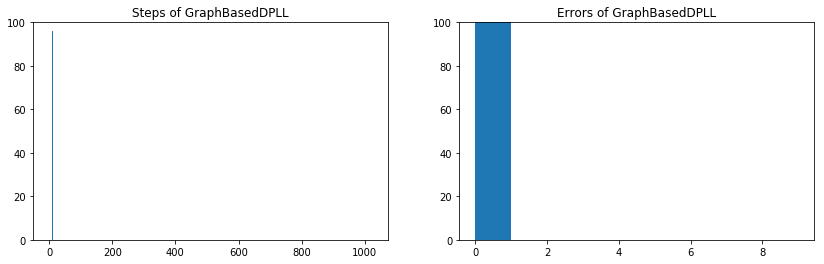

S: 100 K: 3 N: 10 M: 50
#Sats: 100; avg step: 76.83; stdev step: 53.00; avg error: 4.47; stdev error: 1.18


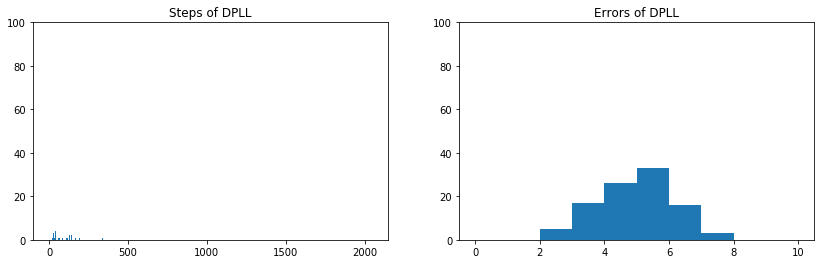

#Sats: 100; avg step: 73.08; stdev step: 54.78; avg error: 4.55; stdev error: 1.53


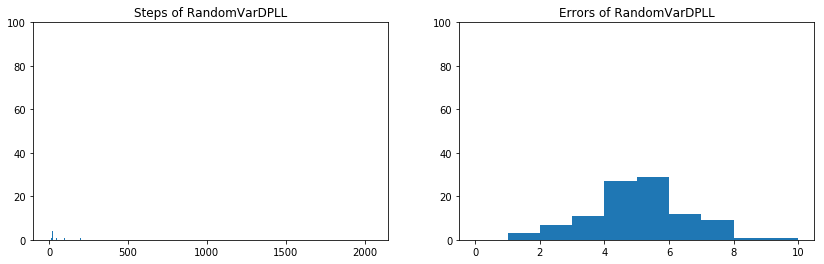

#Sats: 100; avg step: 48.90; stdev step: 34.62; avg error: 2.58; stdev error: 1.53


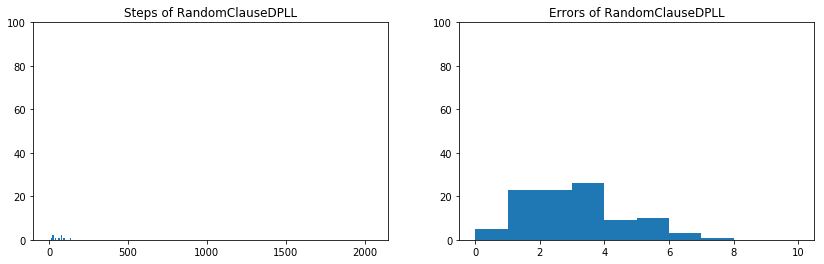

#Sats: 100; avg step: 22.01; stdev step: 20.24; avg error: 0.85; stdev error: 0.86


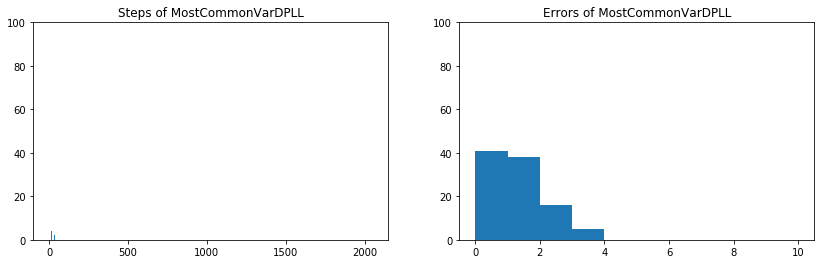

#Sats: 100; avg step: 12.64; stdev step: 10.00; avg error: 0.07; stdev error: 0.26


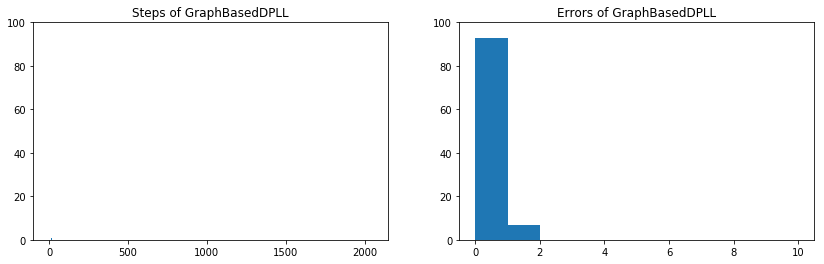

S: 100 K: 3 N: 10 M: 100
#Sats: 100; avg step: 48.04; stdev step: 26.92; avg error: 5.02; stdev error: 1.53


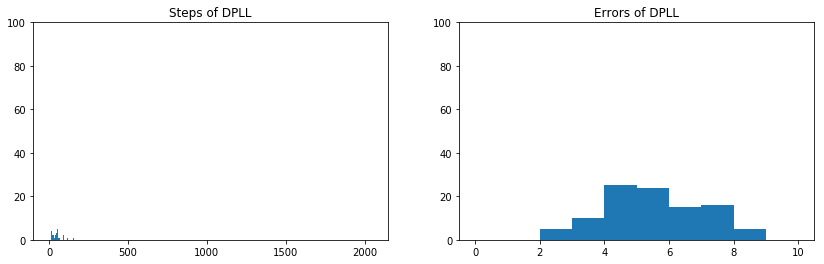

#Sats: 100; avg step: 47.00; stdev step: 24.69; avg error: 5.03; stdev error: 1.45


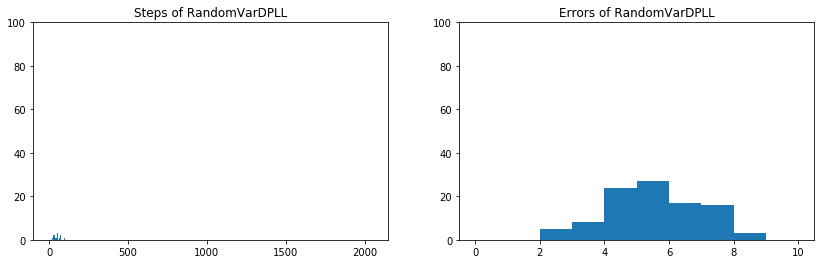

#Sats: 100; avg step: 41.28; stdev step: 21.84; avg error: 3.02; stdev error: 1.48


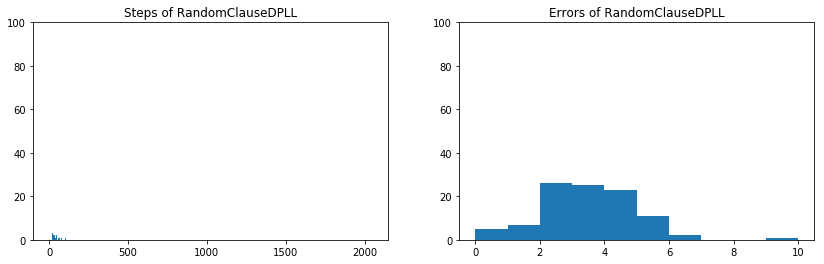

#Sats: 100; avg step: 16.48; stdev step: 9.33; avg error: 0.58; stdev error: 0.67


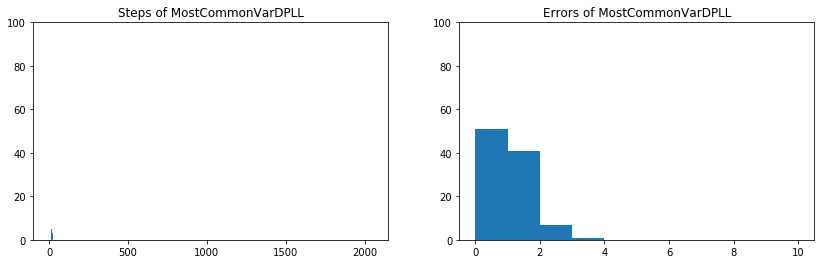

#Sats: 100; avg step: 10.98; stdev step: 0.14; avg error: 0.00; stdev error: 0.00


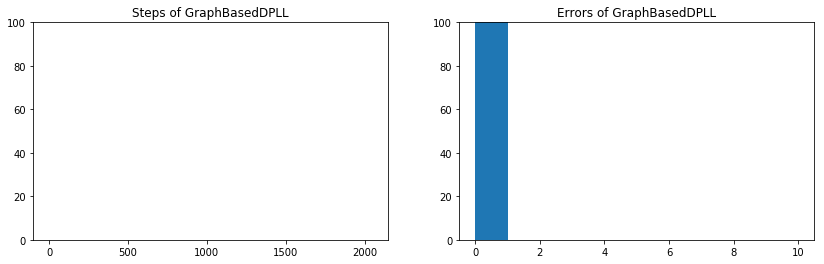

In [11]:
experiments = [
    (100, 2, 2, 3),
    (100, 2, 4, 20)
]

for var_num in range(4, MAX_VARIABLE_NUM + 1):
    experiments += [(100, 3, var_num, var_num * 5),
                    (100, 3, var_num, var_num * 10)]


all_stats = notebook_tools.execute_experiments(experiments, [GraphBasedDPLL])

In [12]:
all_stats

[{'steps': 100,
  'avg_step': 3.69,
  'std_step': 1.083466658462548,
  'avg_error': 0.57,
  'std_error': 0.5874521257089805,
  'dpll_type': 'DPLL',
  's': 100,
  'k': 2,
  'n': 2,
  'm': 3},
 {'steps': 100,
  'avg_step': 3.85,
  'std_step': 1.243985530462473,
  'avg_error': 0.75,
  'std_error': 0.698212002188447,
  'dpll_type': 'RandomVarDPLL',
  's': 100,
  'k': 2,
  'n': 2,
  'm': 3},
 {'steps': 100,
  'avg_step': 2.96,
  'std_step': 0.6621178142898739,
  'avg_error': 0.1,
  'std_error': 0.3,
  'dpll_type': 'RandomClauseDPLL',
  's': 100,
  'k': 2,
  'n': 2,
  'm': 3},
 {'steps': 100,
  'avg_step': 2.7,
  'std_step': 0.47958315233127197,
  'avg_error': 0.01,
  'std_error': 0.09949874371066199,
  'dpll_type': 'MostCommonVarDPLL',
  's': 100,
  'k': 2,
  'n': 2,
  'm': 3},
 {'steps': 100,
  'avg_step': 2.69,
  'std_step': 0.46249324319388707,
  'avg_error': 0.0,
  'std_error': 0.0,
  'dpll_type': 'GraphBasedDPLL',
  's': 100,
  'k': 2,
  'n': 2,
  'm': 3},
 {'steps': 100,
  'avg_step':

randomvar_avg_error  mostcommon_avg_error  lstm_avg_error  \
k m   n                                                               
2 3   2                  0.75                  0.01             NaN   
  20  4                  1.86                  0.11             NaN   
3 20  4                  1.78                  0.34             NaN   
  25  5                  2.12                  0.35             NaN   
  30  6                  2.62                  0.44             NaN   
  35  7                  3.23                  0.51             NaN   
  40  4                  1.85                  0.20             NaN   
      8                  3.28                  0.78             NaN   
  45  9                  4.15                  0.77             NaN   
  50  5                  2.50                  0.29             NaN   
      10                 4.55                  0.85             NaN   
  60  6                  2.82                  0.42             NaN   
  70  7                  3.46                  0.31             NaN   
  80  8                  3.90                  0.42             NaN   
  90  9                  4.50                  0.50             NaN   
  100 10                 5.03                  0.58             NaN   

          randomvar_avg_step  mostcommon_avg_step  lstm_avg_step  
k m   n                                                           
2 3   2                 3.85                 2.70            NaN  
  20  4                 8.36                 5.15            NaN  
3 20  4                10.44                 6.24            NaN  
  25  5                14.28                 7.53            NaN  
  30  6                21.24                 9.40            NaN  
  35  7                30.56                11.02            NaN  
  40  4                 9.89                 5.61            NaN  
      8                41.17                14.98            NaN  
  45  9                62.81                20.28            NaN  
  50  5                14.28                 6.80            NaN  
      10               73.08                22.01            NaN  
  60  6                16.32                 9.13            NaN  
  70  7                23.04                 9.60            NaN  
  80  8                29.70                11.42            NaN  
  90  9                39.58                13.44            NaN  
  100 10               47.00                16.48            NaN

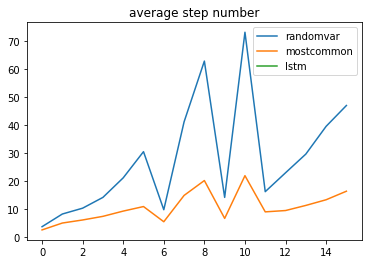

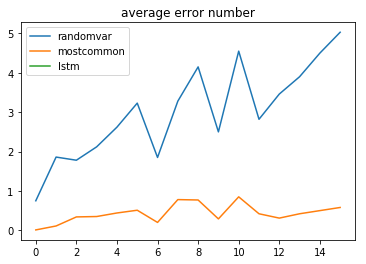

In [13]:
notebook_tools.summary_table_and_plots(all_stats)